# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "f956df277a83558a768d1d55d1173e35496654b6"
connection.set_access_token(API_TOKEN)

# Strategy Creation

## Import Strategy from pyaglostrategypool

In [ ]:
! wget -O moving_average_crossover.py https://raw.githubusercontent.com/algobulls/pyalgostrataegypool/master/pyalgostrategypool/ema_crossover.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' moving_average_crossover.py

In [5]:
from moving_average_crossover import StrategyEMARegularOrder as strategy_cls

In [6]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 130110,
 'strategyId': 'd7f111050fc64dc497d6bf8e89e8d101'}

In [7]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [8]:
instrument = connection.search_instrument('MSFT', exchange='NASDAQ')[0]['value']
instrument

'NASDAQ:MSFT'

## Setup Parameters

In [9]:
vendor_details = {
    'brokerName': 'ALPACAV2',
    'credentialParameters': {
        'CLIENT_API_KEY': 'PKFWEIK28TM4F3NNEYHR', 
        'CLIENT_API_SECRET': '2RaicNUeV8BWIT8qd3S8wOAqMFLwoRESuM37d5tD'
    }
}

In [10]:
# For RT
broking_details = vendor_details
# for our case, vendor and broker both are same - Alpaca

In [11]:
parameters = {
  'TIMEPERIOD1': 12,
  'TIMEPERIOD2': 20,
}

In [12]:
initial_virtual_funds = 4000     # in dollars

## Backtesting

### Start

In [13]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 -0400', 
    end='2023-07-31 15:30 -0400', 
    instrument='NASDAQ:MSFT', 
    lots=5,
    parameters=parameters, 
    candle='1 hour',
    vendor_details=vendor_details,
    initial_funds_virtual=initial_virtual_funds
    
)


Starting the strategy 'EMA Regular Order Strategy US' in BACKTESTING mode...
╒═════════════════════════╤════════════════════════════════════════╕
│ Config                  │ Value                                  │
╞═════════════════════════╪════════════════════════════════════════╡
│ Vendor Name             │ ALPACAV2                               │
├─────────────────────────┼────────────────────────────────────────┤
│ Strategy Name           │ EMA Regular Order Strategy US          │
├─────────────────────────┼────────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                            │
├─────────────────────────┼────────────────────────────────────────┤
│ Instrument(s)           │ ['NASDAQ:MSFT']                        │
├─────────────────────────┼────────────────────────────────────────┤
│ Quantity/Lots           │ 5                                      │
├─────────────────────────┼────────────────────────────────────────┤
│ Start Timestamp        

### Status

In [14]:
connection.get_backtesting_job_status(strategy)

{'message': 'STOPPED', 'status': 0}

### Logs

In [15]:
logs = connection.get_backtesting_logs(strategy)

In [16]:
print(logs)

[2023-08-22 17:02:23] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-08-22 17:02:23] Sanity checks on cfg successful.
[2023-08-22 17:02:24] Currency set to "USD"
[2023-08-22 17:02:24] Setting up broker connection...
[2023-08-22 17:02:26] Broker connection has been setup successfully.
[2023-08-22 17:02:26] (NASDAQ_EQ) Funds available in client's ABVIRTUALBROKER account is : USD '4000.00'
[2023-08-22 17:02:26] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-08-22 17:02:26] Welcome ALGOBULLS VIRTUAL USER!
[2023-08-22 17:02:26] Reading strategy...
[2023-08-22 17:02:26] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  ####### ### #     #  #####     
 #     #    #      # #   

### Stop

In [17]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


## Profit and Loss Reports

In [18]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,pnl_absolute,pnl_cumulative_absolute
0,NASDAQ,MSFT,2021-08-04 10:30:00-04:00,SELL,5,$,284.77,2021-08-04 15:30:00-04:00,BUY,5,$,286.45,-8.40,-8.40
1,NASDAQ,MSFT,2021-08-10 11:30:00-04:00,SELL,5,$,285.73,2021-08-10 15:30:00-04:00,BUY,5,$,285.83,-0.50,-8.90
2,NASDAQ,MSFT,2021-08-12 12:30:00-04:00,BUY,5,$,289.04,2021-08-12 13:30:00-04:00,SELL,5,$,289.04,0.00,-8.90
3,NASDAQ,MSFT,2021-08-12 13:30:00-04:00,BUY,5,$,289.04,2021-08-12 14:30:00-04:00,SELL,5,$,289.04,0.00,-8.90
4,NASDAQ,MSFT,2021-08-12 14:30:00-04:00,BUY,5,$,289.04,2021-08-12 15:30:00-04:00,SELL,5,$,289.04,0.00,-8.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,NASDAQ,MSFT,2023-06-20 12:30:00-04:00,SELL,5,$,336.11,2023-06-20 13:30:00-04:00,BUY,5,$,336.11,0.00,124.80
93,NASDAQ,MSFT,2023-06-20 13:30:00-04:00,SELL,5,$,336.11,2023-06-20 14:30:00-04:00,BUY,5,$,336.11,0.00,124.80
94,NASDAQ,MSFT,2023-06-20 14:30:00-04:00,SELL,5,$,336.11,2023-06-20 15:30:00-04:00,BUY,5,$,336.11,0.00,124.80
95,NASDAQ,MSFT,2023-06-28 10:30:00-04:00,BUY,5,$,336.55,2023-06-28 15:30:00-04:00,SELL,5,$,337.14,2.95,127.75


## Statistics Reports

### Statistics

In [19]:
connection.get_backtesting_report_statistics(strategy, initial_funds=initial_virtual_funds)

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:482: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2021-08-04
End Period          2023-07-12
Risk-Free Rate      0.0%
Time in Market      53.0%

Cumulative Return   2.9%
CAGR﹪              1.49%

Sharpe              2.13
Prob. Sharpe Ratio  90.34%
Sortino             3.46
Sortino/√2          2.45
Omega               1.69

Max Drawdown        -1.22%
Longest DD Days     282

Gain/Pain Ratio     0.69
Gain/Pain (1M)      0.99

Payoff Ratio        1.39
Profit Factor       1.69
Common Sense Ratio  3.17
CPC Index           1.29
Tail Ratio          1.88
Outlier Win Ratio   5.49
Outlier Loss Ratio  3.11

MTD                 -0.49%
3M                  0.06%
6M                  1.7%
YTD                 1.7%
1Y                  1.45%
3Y (ann.)           1.49%
5Y (ann.)           1.49%
10Y (ann.)          1.49%
All-time (ann.)     1.49%

Avg. Drawdown       -0.41%
Avg. Drawdown Days  56
Recovery Factor     2.38
Ulcer Index         0.01
Serenity Index      0.86


### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:482: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-04
End Period                 2023-07-12
Risk-Free Rate             0.0%
Time in Market             53.0%

Cumulative Return          2.9%
CAGR﹪                     1.49%

Sharpe                     2.13
Prob. Sharpe Ratio         90.34%
Smart Sharpe               1.8
Sortino                    3.46
Smart Sortino              2.92
Sortino/√2                 2.45
Smart Sortino/√2           2.06
Omega                      1.69

Max Drawdown               -1.22%
Longest DD Days            282
Volatility (ann.)          3.51%
Calmar                     1.22
Skew                       -0.06
Kurtosis                   4.97

Expected Daily %           0.03%
Expected Monthly %         0.12%
Expected Yearly %          0.96%
Kelly Criterion            22.42%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.33%
Expected Shortfall (cVaR)  -0.33%

Max Consecutive Wins       6
Ma

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-05-24,2022-12-12,2023-03-03,282,-1.218021,-1.214352
2,2022-01-12,2022-02-25,2022-04-27,105,-1.194872,-1.014537
3,2023-05-15,2023-06-01,2023-06-07,22,-0.571019,-0.257566
4,2023-07-12,2023-07-12,2023-07-12,0,-0.489371,NaN
5,2021-08-10,2021-08-30,2021-09-14,35,-0.085179,-0.050105


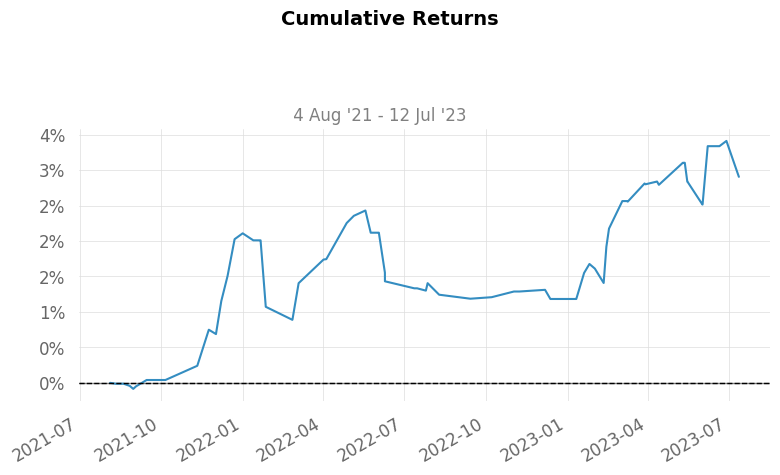

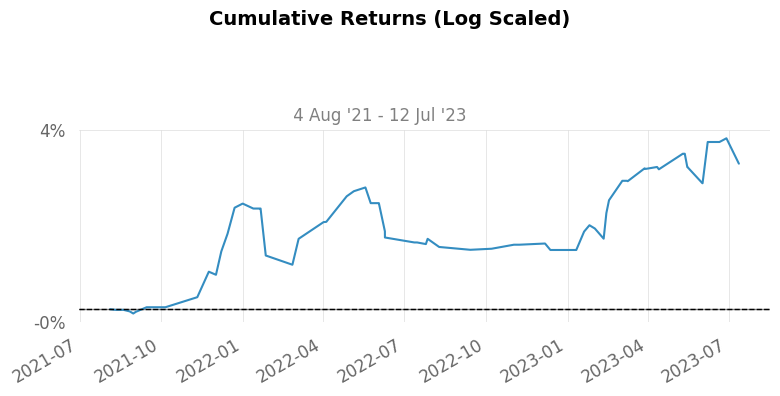

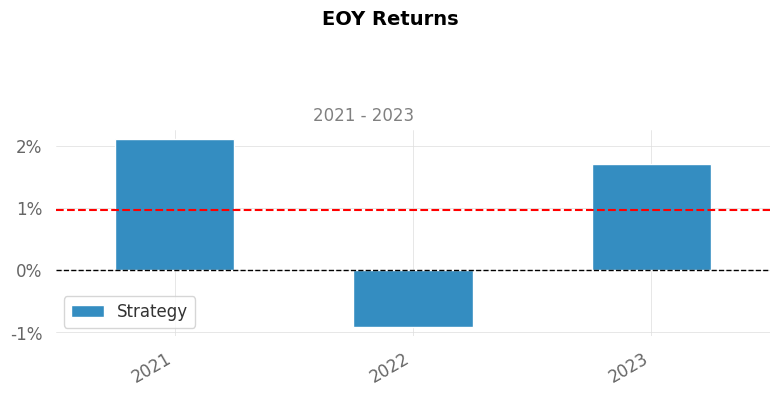

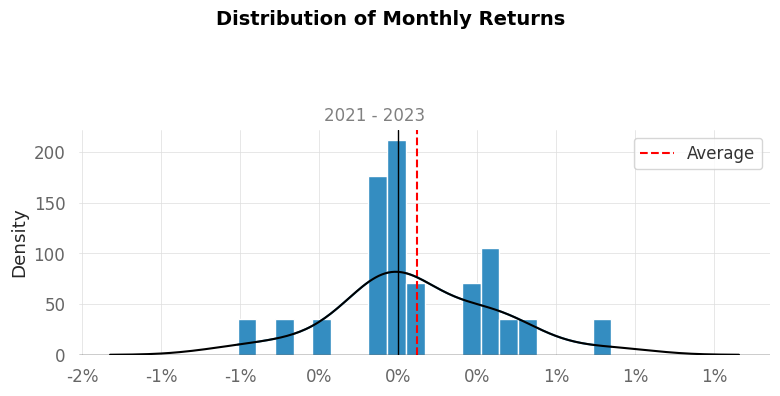

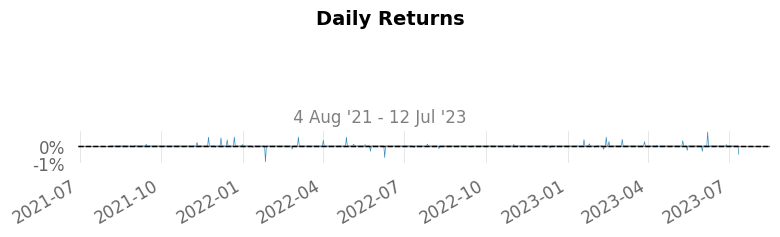

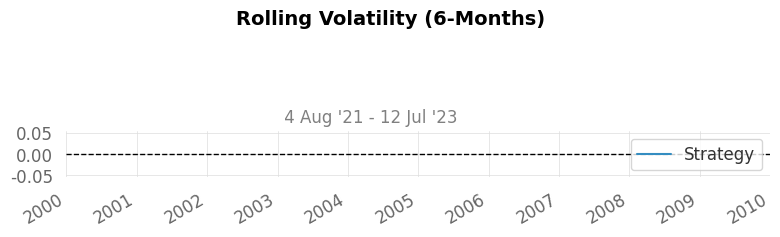

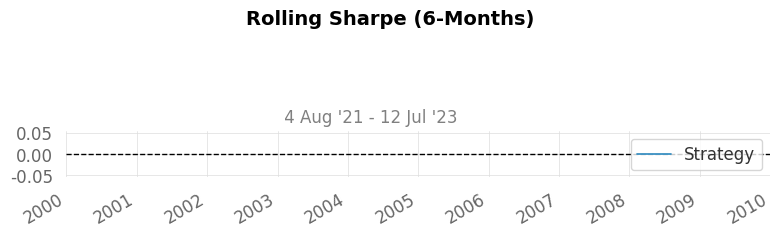

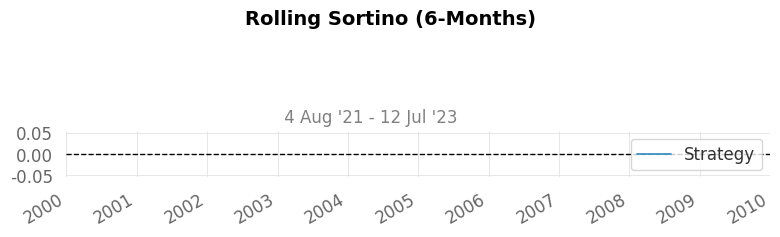

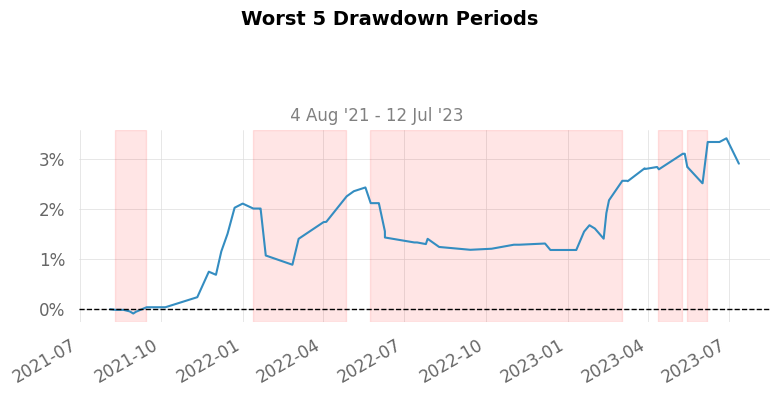

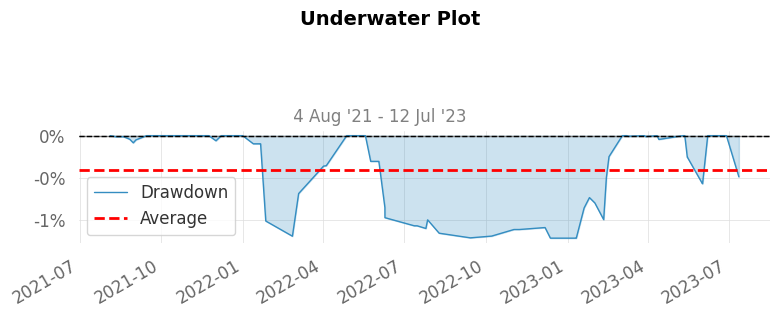

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


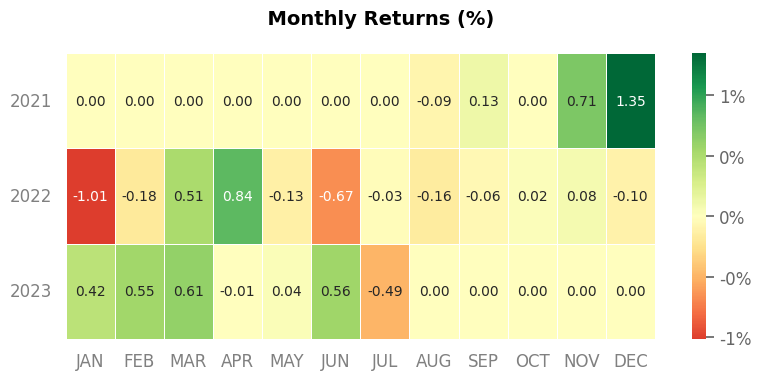

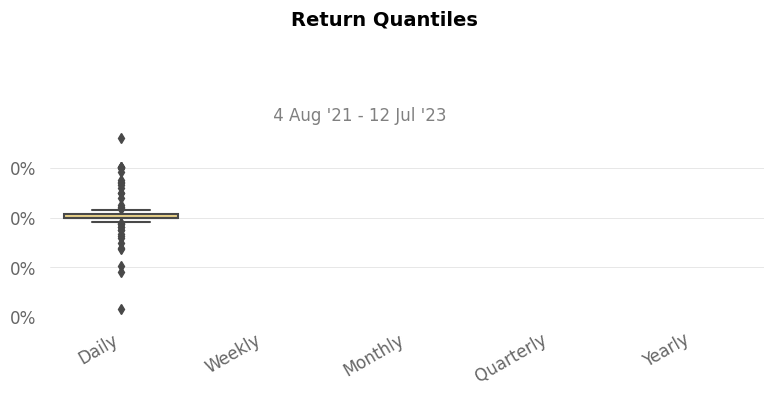

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [20]:
connection.get_backtesting_report_statistics(strategy, mode='quantstats', report='full', html_dump=True, initial_funds=initial_virtual_funds)

## Order History

In [21]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)



+----------------+---------------------------+----------------------------------+------+
| INST           | TIME                      | ID                               | TT   |
|----------------+---------------------------+----------------------------------+------|
| NASDAQ_EQ:MSFT | 2021-08-04 10:30:00-04:00 | 8aaf9ed6c2354d1cb9db37f80f4dced9 | SELL |
+----------------+---------------------------+----------------------------------+------+
+----+----------------------------------+------------------------+-------+
|    | TIME                             | STATE                  | MSG   |
|----+----------------------------------+------------------------+-------|
|  0 | 2021-08-04 10:30:00.500000-04:00 | PUT ORDER REQ RECEIVED |       |
|  1 | 2021-08-04 10:30:00.500000-04:00 | VALIDATION PENDING     |       |
|  2 | 2021-08-04 10:30:00.500000-04:00 | OPEN PENDING           |       |
|  3 | 2021-08-04 10:30:00.500000-04:00 | OPEN                   |       |
|  4 | 2021-08-04 10:30:00.5

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 -0400', 
    end='15:00 -0400',  
    instruments='NASDAQ:MSFT', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    vendor_details=vendor_details
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Papertrading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

## Live Trading (Real Trading)

### Start

In [13]:
connection.realtrade(
    strategy=strategy, 
    start='8:00 -0400', 
    end='15:00 -0400', 
    instruments='NASDAQ:MSFT', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    broking_id=73,
    broking_details=broking_details
)


Starting the strategy 'EMA Regular Order Strategy US' in REALTRADING mode...
╒═════════════════╤════════════════════════════════════════╕
│ Config          │ Value                                  │
╞═════════════════╪════════════════════════════════════════╡
│ Vendor Name     │ ALPACAV2                               │
├─────────────────┼────────────────────────────────────────┤
│ Broker Name     │ ALPACAV2                               │
├─────────────────┼────────────────────────────────────────┤
│ Strategy Name   │ EMA Regular Order Strategy US          │
├─────────────────┼────────────────────────────────────────┤
│ Trading Type    │ REALTRADING                            │
├─────────────────┼────────────────────────────────────────┤
│ Instrument(s)   │ ['NASDAQ:MSFT']                        │
├─────────────────┼────────────────────────────────────────┤
│ Quantity/Lots   │ 5                                      │
├─────────────────┼────────────────────────────────────────┤
│ Start

### Status

In [23]:
connection.get_realtrading_job_status(strategy)

{'message': 'STOPPED', 'status': 0}

### Logs

In [24]:
logs = connection.get_realtrading_logs(strategy)
print(logs)

[2023-08-22 20:21:02] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-08-22 20:21:02] Sanity checks on cfg successful.
[2023-08-22 20:21:02] Currency set to "USD"
[2023-08-22 20:21:02] Setting up broker connection...
[2023-08-22 20:21:04] Broker connection has been setup successfully.
[2023-08-22 20:21:04] (NASDAQ_EQ) Funds available in client's ALPACAV2 account is : USD '3839600.76'
[2023-08-22 20:21:04] [QUERYING] Sanity check: Ensuring all instruments are affordable...
[2023-08-22 20:21:05] [PASSED] Sanity check: All instruments are affordable
[2023-08-22 20:21:05] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-08-22 20:21:05] Welcome PA327K1V17PK!
[2023-08-22 20:21:05] Reading strategy...
[2023-08-22 20:21:07] Entering Realtrading mode. Henceforth, all timestamps will be Realtrading timestamps...
[2023-08-22 10:51:07,090] [INFO] [tls] STARTING ALGOBU

### Stop

In [ ]:
connection.stop_realtrading_job(strategy)

### Profit and Loss Reports (Live Trading)

In [ ]:
pnl_reports = connection.get_realtrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Live Trading)

#### Statistics

In [ ]:
connection.get_realtrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_realtrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)